### Exploring the data

In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
!python --version

Python 3.12.7


In [3]:
pd.__version__

'2.2.3'

In [4]:
sklearn.__version__

'1.6.1'

In [5]:
# !pip install pyarrow

In [6]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet")

In [7]:
# df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet")

# # calculating the trip duration
# df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

# # convert from seconds to minutes
# df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

# # take a subset
# df = df[(df.duration >=1) & (df.duration <= 60)]

# # selecting the variables
# categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

# # convert to a string
# df[categorical] = df[categorical].astype(str)

In [8]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00


In [9]:
# calculating the trip duration
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df['duration']

0       0 days 00:11:30
1       0 days 00:20:52
2       0 days 00:19:02
3       0 days 00:11:52
4       0 days 00:10:59
              ...      
56546   0 days 00:09:00
56547   0 days 00:05:00
56548   0 days 00:04:00
56549   0 days 00:06:00
56550   0 days 00:31:00
Name: duration, Length: 56551, dtype: timedelta64[us]

In [10]:
# convert from seconds to minutes
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [11]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333


In [12]:
# filtering data by trip_type = dispatch
df[df.trip_type == 2]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
36,2,2024-01-01 00:15:43,2024-01-01 00:15:51,N,5.0,61,61,2.0,0.00,22.00,...,0.0,0.00,0.00,NaN,1.0,23.00,2.0,2.0,0.00,0.133333
45,2,2024-01-01 00:34:56,2024-01-01 00:34:57,N,5.0,66,264,2.0,0.00,50.00,...,0.0,10.20,0.00,NaN,1.0,61.20,1.0,2.0,0.00,0.016667
56,2,2024-01-01 00:52:23,2024-01-01 01:07:39,N,5.0,74,127,1.0,5.76,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,15.266667
58,2,2024-01-01 00:55:10,2024-01-01 01:22:19,N,5.0,189,91,2.0,5.04,30.99,...,0.0,6.40,0.00,NaN,1.0,38.39,1.0,2.0,0.00,27.150000
59,2,2024-01-01 00:56:37,2024-01-01 00:56:42,N,5.0,173,173,1.0,0.00,15.00,...,0.0,0.00,0.00,NaN,1.0,16.00,1.0,2.0,0.00,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53099,2,2024-01-31 22:10:36,2024-01-31 22:16:46,N,5.0,42,74,1.0,1.03,8.00,...,0.0,0.00,0.00,NaN,1.0,9.00,2.0,2.0,0.00,6.166667
53110,2,2024-01-31 23:19:51,2024-01-31 23:52:04,N,5.0,25,162,2.0,8.32,40.00,...,0.0,2.00,6.94,NaN,1.0,52.69,1.0,2.0,2.75,32.216667
53123,2,2024-01-31 23:57:29,2024-02-01 00:24:07,N,5.0,181,100,2.0,6.16,60.00,...,0.0,12.75,0.00,NaN,1.0,76.50,1.0,2.0,2.75,26.633333
53133,2,2024-01-31 23:19:14,2024-01-31 23:19:27,N,5.0,181,181,2.0,0.00,74.00,...,0.0,10.00,0.00,NaN,1.0,85.00,1.0,2.0,0.00,0.216667


/tmp/ipykernel_5715/813963452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

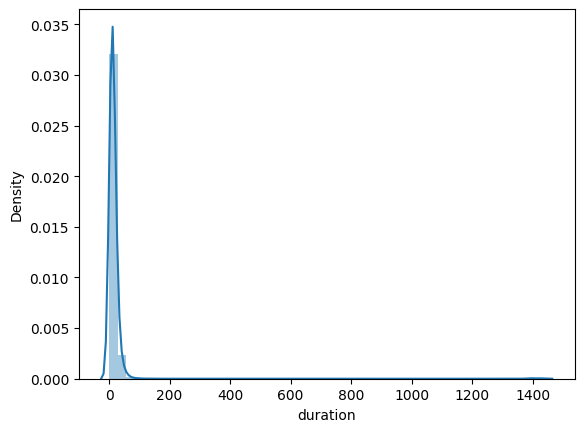

In [13]:
# distribution of the duration
sns.distplot(df.duration)

In [14]:
# show basic statistics
df.duration.describe()

count    56551.000000
mean        18.171379
std         75.464751
min          0.000000
25%          7.250000
50%         11.400000
75%         17.316667
max       1438.983333
Name: duration, dtype: float64

In [15]:
# look at the percentiles 95%, 98% abd 99%
df.duration.describe(percentiles = [0.95, 0.98, 0.99])

count    56551.000000
mean        18.171379
std         75.464751
min          0.000000
50%         11.400000
95%         33.683333
98%         46.816667
99%         59.825000
max       1438.983333
Name: duration, dtype: float64

In [16]:
# filtering the trips in the interval [1 min, 60 min]
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9614860921999611

In [17]:
# take a subset
df = df[(df.duration >=1) & (df.duration <= 60)]

In [18]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.80,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.30,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.80,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.20,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.60,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56546,2,2024-01-31 20:46:00,2024-01-31 20:55:00,None,NaN,33,25,NaN,0.00,11.58,...,0.0,3.14,0.0,NaN,1.0,15.72,NaN,NaN,NaN,9.000000
56547,2,2024-01-31 21:06:00,2024-01-31 21:11:00,None,NaN,72,72,NaN,0.49,11.58,...,0.0,0.00,0.0,NaN,1.0,12.58,NaN,NaN,NaN,5.000000
56548,2,2024-01-31 21:36:00,2024-01-31 21:40:00,None,NaN,72,72,NaN,0.52,11.58,...,0.0,2.52,0.0,NaN,1.0,15.10,NaN,NaN,NaN,4.000000
56549,2,2024-01-31 22:45:00,2024-01-31 22:51:00,None,NaN,41,42,NaN,1.17,14.22,...,0.0,0.00,0.0,NaN,1.0,15.22,NaN,NaN,NaN,6.000000


In [19]:
# selecting the variables
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [20]:
df[categorical].dtypes

PULocationID    int32
DOLocationID    int32
dtype: object

In [21]:
# convert to a string
df[categorical] = df[categorical].astype(str)

In [22]:
df.dtypes

VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [23]:
# # convert the features from dataframes to dictionaries (rows)
# train_dicts = df[categorical + numerical].to_dict(orient='records')

# # inicialize an instance
# dv = DictVectorizer()

# # build train data
# X_train = dv.fit_transform(train_dicts)

# # target variable
# target = 'duration'
# y_train = df[target].values

# # initialize model
# lr = LinearRegression()

# # fit the model
# lr.fit(X_train, y_train)

# # calculate the predictions
# y_pred = lr.predict(X_train)

# # evaluate the model - trainning dataset
# # mean_squared_error(y_train, y_pred, squared=False)
# RMSE = root_mean_squared_error(y_train, y_pred)

In [24]:
# convert the features from dataframes to dictionaries (rows)
# df[categorical + numerical].iloc[:10].to_dict(orient='records') # just to show the result

train_dicts = df[categorical + numerical].to_dict(orient='records')

In [25]:
# inicialize an instance
dv = DictVectorizer()

# build train data
X_train = dv.fit_transform(train_dicts)

In [26]:
X_train.shape

(54373, 449)

In [27]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 163119 stored elements and shape (54373, 449)>

In [28]:
# dv.feature_names_

In [29]:
# target variable
target = 'duration'
y_train = df[target].values

In [30]:
y_train

array([11.5       , 20.86666667, 19.03333333, ...,  4.        ,
        6.        , 31.        ])

In [31]:
# initialize model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
# calculate the predictions
y_pred = lr.predict(X_train)

In [33]:
y_pred

array([10.83670091, 26.19138438, 14.74817784, ..., 27.39585639,
        8.36547539, 22.7543219 ])

/tmp/ipykernel_5715/2101131158.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_5715/2101131158.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


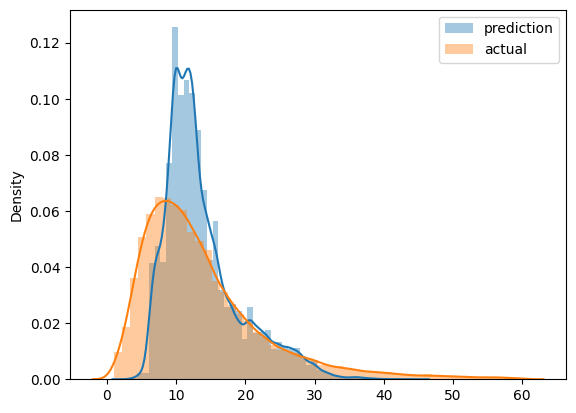

In [34]:
# plot the grap prediction x actual value
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [35]:
# evaluate the model - trainning dataset
# mean_squared_error(y_train, y_pred, squared=False)
RMSE = root_mean_squared_error(y_train, y_pred)

In [36]:
# our model is wrong by around 7 minutes - training data
# RMSE of categorical + numerical = 7.1228220948023795
# RMSE of just numerical = 9.019532837014284
RMSE

7.1228220948023795

### Experiment Tracking - Ridge Regression

OBS: I used the tutorial homework notebook and added the command lines regarding to the tracking

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [22]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("nyc-taxi-experiment")

<Experiment: artifact_location='/workspaces/mlops-zoomcamp-course/02-experiment-tracking/mlruns/1', creation_time=1747840272355, experiment_id='1', last_update_time=1747840272355, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [6]:
def read_dataframe(filename):

    # "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet"
    df = pd.read_parquet(filename)

    # calculating the trip duration
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    
    # convert from seconds to minutes
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    # take a subset
    df = df[(df.duration >=1) & (df.duration <= 60)]
    
    # selecting the variables
    categorical = ['PULocationID', 'DOLocationID']
    
    # convert to a string
    df[categorical] = df[categorical].astype(str)

    return df

In [7]:
# df_train = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet")
# df_val = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet")

df_train = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet")
df_val = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet")

In [8]:
df_train.shape, df_val.shape

((54373, 21), (51497, 21))

In [9]:
df_train.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333


In [10]:
# feature engineering
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [11]:
df_val.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
0,2,2024-02-01 00:15:53,2024-02-01 00:24:20,N,1.0,75,161,1.0,2.77,13.5,...,3.75,0.0,NaN,1.0,22.50,1.0,1.0,2.75,8.450000,75_161
1,2,2024-01-31 22:59:22,2024-01-31 23:27:14,N,1.0,43,242,1.0,7.76,36.6,...,0.00,0.0,NaN,1.0,39.10,2.0,1.0,0.00,27.866667,43_242
2,2,2024-02-01 00:30:29,2024-02-01 00:35:32,N,1.0,75,238,1.0,1.03,7.9,...,2.60,0.0,NaN,1.0,13.00,1.0,1.0,0.00,5.050000,75_238
3,2,2024-01-31 23:56:42,2024-02-01 00:06:53,N,1.0,80,17,2.0,1.36,11.4,...,4.17,0.0,NaN,1.0,18.07,1.0,1.0,0.00,10.183333,80_17
5,2,2024-02-01 00:06:23,2024-02-01 00:10:10,N,1.0,97,25,1.0,0.34,5.1,...,0.00,0.0,NaN,1.0,7.60,2.0,1.0,0.00,3.783333,97_25


In [12]:
# selecting the variables
# categorical = ['PULocationID', 'DOLocationID']
categorical = ['PU_DO']
numerical = ['trip_distance']

# inicialize an instance
dv = DictVectorizer()

# convert the features from dataframes to dictionaries (rows) - train set
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

# build train data
X_train = dv.fit_transform(train_dicts)

# convert the features from dataframes to dictionaries (rows) - validation set
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

# build validation data
X_val = dv.transform(val_dicts)

In [13]:
# target variable
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [14]:
y_train.shape, y_val.shape

((54373,), (51497,))

In [15]:
# Linear Regression

# initialize model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# calculate the predictions
y_pred = lr.predict(X_val)

# evaluate the model - validation dataset
# mean_squared_error(y_train, y_pred, squared=False)
RMSE = root_mean_squared_error(y_val, y_pred)
RMSE

5.9947992164797

In [16]:
# Lasso Regression

# initialize model
linear_reg = Lasso(alpha=0.001)

# fit the model
linear_reg.fit(X_train, y_train)

# calculate the predictions
y_pred_ = linear_reg.predict(X_val)

# evaluate the model - validation dataset
RMSE = root_mean_squared_error(y_val, y_pred_)
RMSE

6.583747374286971

In [17]:
# Ridge Regression

with mlflow.start_run():

    mlflow.set_tag("developer", "luciana")

    mlflow.log_param("train-data-path", df_train)
    mlflow.log_param("validation-data-path", df_val)

    alpha = 0.1
    mlflow.log_param("alpha", alpha)

    # initialize model
    linear_reg = Ridge(alpha)
    
    # fit the model
    linear_reg.fit(X_train, y_train)
    
    # calculate the predictions
    y_pred_ = linear_reg.predict(X_val)
    
    # evaluate the model - validation dataset
    RMSE = root_mean_squared_error(y_val, y_pred_)
    mlflow.log_metric("rmse", RMSE)


In [18]:
RMSE

5.975209548704519

In [19]:
with open('models/linear_regression_ridge_green.bin', 'wb') as f_out:
    pickle.dump((dv, linear_reg), f_out)

### Experiment Tracking XgBoost

In [1]:
# imports
import xgboost as xgb

In [2]:
# library for hyperparameter optimization
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [19]:
train = xgb.DMatrix(X_train, label=y_train)
validation = xgb.DMatrix(X_val, label=y_val)

In [23]:
def objective(params):

    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)

        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(validation, 'validation')],
            early_stopping_rounds=50
        )

        y_pred = booster.predict(validation)
        RMSE = root_mean_squared_error(y_val, y_pred_)

        mlflow.log_metric("rmse", RMSE)

    return {'loss': RMSE, 'status': STATUS_OK}

In [24]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

  0%|                                                                                                                   | 0/50 [00:00<?, ?trial/s, best loss=?]

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:05:12] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.51399                                                                                                                                    
[1]	validation-rmse:5.34900                                                                                                                                    
[2]	validation-rmse:5.32657                                                                                                                                    
[3]	validation-rmse:5.30893                                                                                                                                    
[4]	validation-rmse:5.28757                                                                                                                                    
[5]	validation-rmse:5.27942                                                                                                                                    
[6]	validation-rmse:5.27790             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:05:29] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.67684                                                                                                                                    
[1]	validation-rmse:5.79847                                                                                                                                    
[2]	validation-rmse:5.51436                                                                                                                                    
[3]	validation-rmse:5.40971                                                                                                                                    
[4]	validation-rmse:5.37476                                                                                                                                    
[5]	validation-rmse:5.35674                                                                                                                                    
[6]	validation-rmse:5.34603             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:05:53] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.81118                                                                                                                                    
[1]	validation-rmse:5.45428                                                                                                                                    
[2]	validation-rmse:5.38207                                                                                                                                    
[3]	validation-rmse:5.36966                                                                                                                                    
[4]	validation-rmse:5.35460                                                                                                                                    
[5]	validation-rmse:5.34775                                                                                                                                    
[6]	validation-rmse:5.34601             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:06:03] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[1]	validation-rmse:5.53781                                                                                                                                    
[2]	validation-rmse:5.42414                                                                                                                                    
[3]	validation-rmse:5.39473                                                                                                                                    
[4]	validation-rmse:5.37946                                                                                                                                    
[5]	validation-rmse:5.37374                                                                                                                                    
[6]	validation-rmse:5.37018                                                                                                                                    
[7]	validation-rmse:5.36251             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:06:18] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.44442                                                                                                                                    
[1]	validation-rmse:6.47273                                                                                                                                    
[2]	validation-rmse:5.93023                                                                                                                                    
[3]	validation-rmse:5.64017                                                                                                                                    
[4]	validation-rmse:5.47819                                                                                                                                    
[5]	validation-rmse:5.38685                                                                                                                                    
[6]	validation-rmse:5.33426             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:06:35] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.10284                                                                                                                                    
[1]	validation-rmse:5.58514                                                                                                                                    
[2]	validation-rmse:5.48982                                                                                                                                    
[3]	validation-rmse:5.44892                                                                                                                                    
[4]	validation-rmse:5.43735                                                                                                                                    
[5]	validation-rmse:5.42236                                                                                                                                    
[6]	validation-rmse:5.40378             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:07:07] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.69700                                                                                                                                    
[1]	validation-rmse:8.32283                                                                                                                                    
[2]	validation-rmse:7.98604                                                                                                                                    
[3]	validation-rmse:7.68326                                                                                                                                    
[4]	validation-rmse:7.41190                                                                                                                                    
[5]	validation-rmse:7.16981                                                                                                                                    
[6]	validation-rmse:6.95367             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:09:22] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.80894                                                                                                                                    
[1]	validation-rmse:8.52748                                                                                                                                    
[2]	validation-rmse:8.26590                                                                                                                                    
[3]	validation-rmse:8.02305                                                                                                                                    
[4]	validation-rmse:7.79789                                                                                                                                    
[5]	validation-rmse:7.58945                                                                                                                                    
[6]	validation-rmse:7.39690             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:11:31] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.98088                                                                                                                                    
[1]	validation-rmse:5.49497                                                                                                                                    
[2]	validation-rmse:5.43828                                                                                                                                    
[3]	validation-rmse:5.41951                                                                                                                                    
[4]	validation-rmse:5.40901                                                                                                                                    
[5]	validation-rmse:5.39081                                                                                                                                    
[6]	validation-rmse:5.39014             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:11:51] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.97354                                                                                                                                    
[1]	validation-rmse:7.14144                                                                                                                                    
[2]	validation-rmse:6.54345                                                                                                                                    
[3]	validation-rmse:6.12653                                                                                                                                    
[4]	validation-rmse:5.83437                                                                                                                                    
[5]	validation-rmse:5.63670                                                                                                                                    
[6]	validation-rmse:5.50147             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:12:22] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.37020                                                                                                                                    
[1]	validation-rmse:5.63925                                                                                                                                    
[2]	validation-rmse:5.46283                                                                                                                                    
[3]	validation-rmse:5.40940                                                                                                                                    
[4]	validation-rmse:5.38589                                                                                                                                    
[5]	validation-rmse:5.37173                                                                                                                                    
[6]	validation-rmse:5.35926             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:12:53] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[4]	validation-rmse:5.47668                                                                                                                                    
[5]	validation-rmse:5.46629                                                                                                                                    
[6]	validation-rmse:5.46036                                                                                                                                    
[7]	validation-rmse:5.45333                                                                                                                                    
[8]	validation-rmse:5.44549                                                                                                                                    
[9]	validation-rmse:5.44017                                                                                                                                    
[10]	validation-rmse:5.43516            

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:13:19] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.41086                                                                                                                                    
[1]	validation-rmse:5.67050                                                                                                                                    
[2]	validation-rmse:5.48063                                                                                                                                    
[3]	validation-rmse:5.42461                                                                                                                                    
[4]	validation-rmse:5.40336                                                                                                                                    
[5]	validation-rmse:5.39262                                                                                                                                    
[6]	validation-rmse:5.39162             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:13:31] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.60180                                                                                                                                    
[1]	validation-rmse:5.45323                                                                                                                                    
[2]	validation-rmse:5.45013                                                                                                                                    
[3]	validation-rmse:5.44173                                                                                                                                    
[4]	validation-rmse:5.44008                                                                                                                                    
[5]	validation-rmse:5.43552                                                                                                                                    
[6]	validation-rmse:5.43767             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:13:39] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.24092                                                                                                                                    
[1]	validation-rmse:6.27106                                                                                                                                    
[2]	validation-rmse:5.80005                                                                                                                                    
[3]	validation-rmse:5.58467                                                                                                                                    
[4]	validation-rmse:5.47708                                                                                                                                    
[5]	validation-rmse:5.42688                                                                                                                                    
[6]	validation-rmse:5.39994             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:14:20] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.69781                                                                                                                                    
[1]	validation-rmse:8.32494                                                                                                                                    
[2]	validation-rmse:7.98962                                                                                                                                    
[3]	validation-rmse:7.68897                                                                                                                                    
[4]	validation-rmse:7.41974                                                                                                                                    
[5]	validation-rmse:7.17933                                                                                                                                    
[6]	validation-rmse:6.96514             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:15:41] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.38423                                                                                                                                    
[1]	validation-rmse:7.78156                                                                                                                                    
[2]	validation-rmse:7.28788                                                                                                                                    
[3]	validation-rmse:6.88195                                                                                                                                    
[4]	validation-rmse:6.55513                                                                                                                                    
[5]	validation-rmse:6.29105                                                                                                                                    
[6]	validation-rmse:6.08215             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:16:21] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.54525                                                                                                                                    
[1]	validation-rmse:8.05405                                                                                                                                    
[2]	validation-rmse:7.63543                                                                                                                                    
[3]	validation-rmse:7.27255                                                                                                                                    
[4]	validation-rmse:6.96336                                                                                                                                    
[5]	validation-rmse:6.70145                                                                                                                                    
[6]	validation-rmse:6.46623             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:17:25] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.75724                                                                                                                                    
[1]	validation-rmse:5.84191                                                                                                                                    
[2]	validation-rmse:5.49891                                                                                                                                    
[3]	validation-rmse:5.36884                                                                                                                                    
[4]	validation-rmse:5.31015                                                                                                                                    
[5]	validation-rmse:5.27971                                                                                                                                    
[6]	validation-rmse:5.27211             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:17:40] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.23996                                                                                                                                    
[1]	validation-rmse:7.54400                                                                                                                                    
[2]	validation-rmse:6.99249                                                                                                                                    
[3]	validation-rmse:6.56260                                                                                                                                    
[4]	validation-rmse:6.22989                                                                                                                                    
[5]	validation-rmse:5.97634                                                                                                                                    
[6]	validation-rmse:5.78365             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:18:28] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.49808                                                                                                                                    
[1]	validation-rmse:7.97183                                                                                                                                    
[2]	validation-rmse:7.52311                                                                                                                                    
[3]	validation-rmse:7.14177                                                                                                                                    
[4]	validation-rmse:6.82039                                                                                                                                    
[5]	validation-rmse:6.55009                                                                                                                                    
[6]	validation-rmse:6.32477             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:19:44] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.35256                                                                                                                                    
[1]	validation-rmse:5.28532                                                                                                                                    
[2]	validation-rmse:5.27610                                                                                                                                    
[3]	validation-rmse:5.26471                                                                                                                                    
[4]	validation-rmse:5.25697                                                                                                                                    
[5]	validation-rmse:5.25006                                                                                                                                    
[6]	validation-rmse:5.24641             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:19:57] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.95274                                                                                                                                    
[1]	validation-rmse:7.10662                                                                                                                                    
[2]	validation-rmse:6.50366                                                                                                                                    
[3]	validation-rmse:6.08610                                                                                                                                    
[4]	validation-rmse:5.79695                                                                                                                                    
[5]	validation-rmse:5.60243                                                                                                                                    
[6]	validation-rmse:5.47331             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:20:33] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.27869                                                                                                                                    
[1]	validation-rmse:7.60760                                                                                                                                    
[2]	validation-rmse:7.07217                                                                                                                                    
[3]	validation-rmse:6.64852                                                                                                                                    
[4]	validation-rmse:6.31822                                                                                                                                    
[5]	validation-rmse:6.06301                                                                                                                                    
[6]	validation-rmse:5.86633             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:21:25] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.34062                                                                                                                                    
[1]	validation-rmse:5.29837                                                                                                                                    
[2]	validation-rmse:5.28774                                                                                                                                    
[3]	validation-rmse:5.28282                                                                                                                                    
[4]	validation-rmse:5.27220                                                                                                                                    
[5]	validation-rmse:5.26292                                                                                                                                    
[6]	validation-rmse:5.25635             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:21:37] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.81107                                                                                                                                    
[1]	validation-rmse:6.91336                                                                                                                                    
[2]	validation-rmse:6.30426                                                                                                                                    
[3]	validation-rmse:5.90298                                                                                                                                    
[4]	validation-rmse:5.64931                                                                                                                                    
[5]	validation-rmse:5.48613                                                                                                                                    
[6]	validation-rmse:5.38674             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:22:06] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.45809                                                                                                                                    
[1]	validation-rmse:6.51794                                                                                                                                    
[2]	validation-rmse:6.01189                                                                                                                                    
[3]	validation-rmse:5.74904                                                                                                                                    
[4]	validation-rmse:5.61384                                                                                                                                    
[5]	validation-rmse:5.54240                                                                                                                                    
[6]	validation-rmse:5.50044             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:23:10] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.39766                                                                                                                                    
[1]	validation-rmse:5.32401                                                                                                                                    
[2]	validation-rmse:5.30127                                                                                                                                    
[3]	validation-rmse:5.29098                                                                                                                                    
[4]	validation-rmse:5.27099                                                                                                                                    
[5]	validation-rmse:5.26835                                                                                                                                    
[6]	validation-rmse:5.26949             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:23:25] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.77147                                                                                                                                    
[1]	validation-rmse:6.86146                                                                                                                                    
[2]	validation-rmse:6.25394                                                                                                                                    
[3]	validation-rmse:5.86687                                                                                                                                    
[4]	validation-rmse:5.61485                                                                                                                                    
[5]	validation-rmse:5.46210                                                                                                                                    
[6]	validation-rmse:5.36614             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:23:49] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.23399                                                                                                                                    
[1]	validation-rmse:6.28511                                                                                                                                    
[2]	validation-rmse:5.83543                                                                                                                                    
[3]	validation-rmse:5.63101                                                                                                                                    
[4]	validation-rmse:5.53642                                                                                                                                    
[5]	validation-rmse:5.48909                                                                                                                                    
[6]	validation-rmse:5.45913             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:24:39] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.56637                                                                                                                                    
[1]	validation-rmse:5.34246                                                                                                                                    
[2]	validation-rmse:5.31029                                                                                                                                    
[3]	validation-rmse:5.29440                                                                                                                                    
[4]	validation-rmse:5.29606                                                                                                                                    
[5]	validation-rmse:5.27703                                                                                                                                    
[6]	validation-rmse:5.27116             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:24:58] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.72111                                                                                                                                    
[1]	validation-rmse:5.76251                                                                                                                                    
[2]	validation-rmse:5.41417                                                                                                                                    
[3]	validation-rmse:5.29175                                                                                                                                    
[4]	validation-rmse:5.23753                                                                                                                                    
[5]	validation-rmse:5.21717                                                                                                                                    
[6]	validation-rmse:5.20818             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:25:15] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.10526                                                                                                                                    
[1]	validation-rmse:6.13685                                                                                                                                    
[2]	validation-rmse:5.70415                                                                                                                                    
[3]	validation-rmse:5.51161                                                                                                                                    
[4]	validation-rmse:5.42707                                                                                                                                    
[5]	validation-rmse:5.38369                                                                                                                                    
[6]	validation-rmse:5.36199             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:25:43] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.60153                                                                                                                                    
[1]	validation-rmse:5.30734                                                                                                                                    
[2]	validation-rmse:5.27943                                                                                                                                    
[3]	validation-rmse:5.26233                                                                                                                                    
[4]	validation-rmse:5.25766                                                                                                                                    
[5]	validation-rmse:5.25110                                                                                                                                    
[6]	validation-rmse:5.24443             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:25:58] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.78178                                                                                                                                    
[1]	validation-rmse:5.80721                                                                                                                                    
[2]	validation-rmse:5.44270                                                                                                                                    
[3]	validation-rmse:5.31743                                                                                                                                    
[4]	validation-rmse:5.26450                                                                                                                                    
[5]	validation-rmse:5.24739                                                                                                                                    
[6]	validation-rmse:5.23346             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:26:17] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.15544                                                                                                                                    
[1]	validation-rmse:7.41166                                                                                                                                    
[2]	validation-rmse:6.84142                                                                                                                                    
[3]	validation-rmse:6.40919                                                                                                                                    
[4]	validation-rmse:6.08842                                                                                                                                    
[5]	validation-rmse:5.85166                                                                                                                                    
[6]	validation-rmse:5.67937             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:27:07] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.79103                                                                                                                                    
[1]	validation-rmse:8.49404                                                                                                                                    
[2]	validation-rmse:8.21975                                                                                                                                    
[3]	validation-rmse:7.96583                                                                                                                                    
[4]	validation-rmse:7.73180                                                                                                                                    
[5]	validation-rmse:7.51583                                                                                                                                    
[6]	validation-rmse:7.31707             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:28:44] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.53698                                                                                                                                    
[1]	validation-rmse:8.04056                                                                                                                                    
[2]	validation-rmse:7.61368                                                                                                                                    
[3]	validation-rmse:7.24841                                                                                                                                    
[4]	validation-rmse:6.93810                                                                                                                                    
[5]	validation-rmse:6.67545                                                                                                                                    
[6]	validation-rmse:6.45370             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:30:08] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.53240                                                                                                                                    
[1]	validation-rmse:6.55821                                                                                                                                    
[2]	validation-rmse:5.98220                                                                                                                                    
[3]	validation-rmse:5.65735                                                                                                                                    
[4]	validation-rmse:5.48042                                                                                                                                    
[5]	validation-rmse:5.38143                                                                                                                                    
[6]	validation-rmse:5.32404             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:30:40] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:5.95176                                                                                                                                    
[1]	validation-rmse:5.46630                                                                                                                                    
[2]	validation-rmse:5.37770                                                                                                                                    
[3]	validation-rmse:5.35363                                                                                                                                    
[4]	validation-rmse:5.33552                                                                                                                                    
[5]	validation-rmse:5.31763                                                                                                                                    
[6]	validation-rmse:5.31385             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:30:57] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.07254                                                                                                                                    
[1]	validation-rmse:7.28590                                                                                                                                    
[2]	validation-rmse:6.71689                                                                                                                                    
[3]	validation-rmse:6.31834                                                                                                                                    
[4]	validation-rmse:6.01507                                                                                                                                    
[5]	validation-rmse:5.80073                                                                                                                                    
[6]	validation-rmse:5.64916             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:31:44] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.67228                                                                                                                                    
[1]	validation-rmse:6.73039                                                                                                                                    
[2]	validation-rmse:6.16641                                                                                                                                    
[3]	validation-rmse:5.84234                                                                                                                                    
[4]	validation-rmse:5.63221                                                                                                                                    
[5]	validation-rmse:5.50485                                                                                                                                    
[6]	validation-rmse:5.44190             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:32:20] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.62925                                                                                                                                    
[1]	validation-rmse:8.20074                                                                                                                                    
[2]	validation-rmse:7.82119                                                                                                                                    
[3]	validation-rmse:7.48668                                                                                                                                    
[4]	validation-rmse:7.19268                                                                                                                                    
[5]	validation-rmse:6.93476                                                                                                                                    
[6]	validation-rmse:6.70965             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:33:41] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:8.36409                                                                                                                                    
[1]	validation-rmse:7.74496                                                                                                                                    
[2]	validation-rmse:7.23838                                                                                                                                    
[3]	validation-rmse:6.82386                                                                                                                                    
[4]	validation-rmse:6.48898                                                                                                                                    
[5]	validation-rmse:6.22078                                                                                                                                    
[6]	validation-rmse:6.00722             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:34:31] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.18206                                                                                                                                    
[1]	validation-rmse:5.46602                                                                                                                                    
[2]	validation-rmse:5.31677                                                                                                                                    
[3]	validation-rmse:5.27775                                                                                                                                    
[4]	validation-rmse:5.26002                                                                                                                                    
[5]	validation-rmse:5.24827                                                                                                                                    
[6]	validation-rmse:5.24168             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:34:52] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[4]	validation-rmse:5.59038                                                                                                                                    
[5]	validation-rmse:5.57570                                                                                                                                    
[6]	validation-rmse:5.56942                                                                                                                                    
[7]	validation-rmse:5.56048                                                                                                                                    
[8]	validation-rmse:5.55392                                                                                                                                    
[9]	validation-rmse:5.54920                                                                                                                                    
[10]	validation-rmse:5.54462            

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:35:09] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.77576                                                                                                                                    
[1]	validation-rmse:6.87778                                                                                                                                    
[2]	validation-rmse:6.30039                                                                                                                                    
[3]	validation-rmse:5.91663                                                                                                                                    
[4]	validation-rmse:5.68901                                                                                                                                    
[5]	validation-rmse:5.56742                                                                                                                                    
[6]	validation-rmse:5.47705             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:35:43] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:6.47351                                                                                                                                    
[1]	validation-rmse:5.58732                                                                                                                                    
[2]	validation-rmse:5.32578                                                                                                                                    
[3]	validation-rmse:5.24780                                                                                                                                    
[4]	validation-rmse:5.22244                                                                                                                                    
[5]	validation-rmse:5.21301                                                                                                                                    
[6]	validation-rmse:5.20621             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:36:00] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[0]	validation-rmse:7.59323                                                                                                                                    
[1]	validation-rmse:6.67359                                                                                                                                    
[2]	validation-rmse:6.13998                                                                                                                                    
[3]	validation-rmse:5.84293                                                                                                                                    
[4]	validation-rmse:5.67749                                                                                                                                    
[5]	validation-rmse:5.58574                                                                                                                                    
[6]	validation-rmse:5.53069             

/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:36:52] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[2]	validation-rmse:6.04623                                                                                                                                    
[3]	validation-rmse:5.77577                                                                                                                                    
[4]	validation-rmse:5.63384                                                                                                                                    
[5]	validation-rmse:5.55993                                                                                                                                    
[6]	validation-rmse:5.51832                                                                                                                                    
[7]	validation-rmse:5.49619                                                                                                                                    
[8]	validation-rmse:5.47816             

In [27]:
params = {
    'learning_rate': 0.30615936833529955,
    'max_depth': 11,
    'min_child_weight': 19.95136749382977,
    'objective': 'reg:linear',
    'reg_alpha': 0.05374670680828035,
    'reg_lambda': 0.04607409864572557,
    'seed': 42
}

# using autolog instead of the previous approach
# autlog works with some frameworks, xgboost is one of them
mlflow.xgboost.autolog()

booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=100, # changed from 1000 to 100 just to test
            evals=[(validation, 'validation')],
            early_stopping_rounds=50
        )

2025/05/22 19:43:10 WARNING mlflow.utils.autologging_utils: MLflow xgboost autologging is known to be compatible with 1.4.2 <= xgboost <= 3.0.0, but the installed version is 3.0.1. If you encounter errors during autologging, try upgrading / downgrading xgboost to a compatible version, or try upgrading MLflow.
2025/05/22 19:43:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '91f610db109c423db4be9360a66b367f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow


[0]	validation-rmse:7.48535
[1]	validation-rmse:6.55455


/home/codespace/anaconda3/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [19:43:11] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()


[2]	validation-rmse:6.04623
[3]	validation-rmse:5.77577
[4]	validation-rmse:5.63384
[5]	validation-rmse:5.55993
[6]	validation-rmse:5.51832
[7]	validation-rmse:5.49619
[8]	validation-rmse:5.47816
[9]	validation-rmse:5.46937
[10]	validation-rmse:5.45712
[11]	validation-rmse:5.45198
[12]	validation-rmse:5.44800
[13]	validation-rmse:5.44488
[14]	validation-rmse:5.44245
[15]	validation-rmse:5.43794
[16]	validation-rmse:5.43600
[17]	validation-rmse:5.43125
[18]	validation-rmse:5.43008
[19]	validation-rmse:5.42776
[20]	validation-rmse:5.42676
[21]	validation-rmse:5.42047
[22]	validation-rmse:5.41488
[23]	validation-rmse:5.41307
[24]	validation-rmse:5.41225
[25]	validation-rmse:5.41129
[26]	validation-rmse:5.40854
[27]	validation-rmse:5.40746
[28]	validation-rmse:5.40632
[29]	validation-rmse:5.40403
[30]	validation-rmse:5.40216
[31]	validation-rmse:5.39995
[32]	validation-rmse:5.39856
[33]	validation-rmse:5.39807
[34]	validation-rmse:5.39571
[35]	validation-rmse:5.39463
[36]	validation-rmse:5

2025/05/22 19:43:18 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.
2025/05/22 19:43:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/codespace/anaconda3/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:168: UserWarning: [19:43:18] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
2025/05/22 19:43:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
